In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras


ds = tfds.load('aflw2k3d', split='train')
# for ex in ds.take(4):
#  print(ex['image'])

images = []
landmarks2D = []

for ex in ds.take(2000):
  images.append(ex['image'])
  landmarks2D.append((ex['landmarks_68_3d_xy_normalized']))
  # landmarks2D.append(np.array(ex['landmarks_68_3d_xy_normalized']).flatten())

print (len(images))
# print(len(images[0]))
print (landmarks2D[1].shape)


2000
(68, 2)


In [ ]:
images = []
landmarks2D = []
for ex in ds.take(2000):
  images.append(ex['image'])
  # landmarks2D.append((ex['landmarks_68_3d_xy_normalized']))
  landmarks2D.append(np.array(ex['landmarks_68_3d_xy_normalized']).flatten())
  # take x,y only then flatten bec model receive data as flattened
print (len(images))
# print(len(images[0]))
print (landmarks2D[1].shape)

2000
(136,)


In [ ]:
print (len(images))
print((images[0].shape))
# print (landmarks2D[1].shape)
# print(landmarks2D[0])
# plt.imshow(images[0])
# plt.show()


2000
(450, 450, 3)


Epoch 1/10
43/43 [==============================] - 9s 173ms/step - loss: 423340.8125 - accuracy: 0.0111 - val_loss: 1579502.6250 - val_accuracy: 0.0000e+00
Epoch 2/10
43/43 [==============================] - 5s 126ms/step - loss: 8310147.5000 - accuracy: 0.0148 - val_loss: 22776782.0000 - val_accuracy: 0.0133
Epoch 3/10
43/43 [==============================] - 5s 126ms/step - loss: 67161696.0000 - accuracy: 0.0126 - val_loss: 137035824.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
43/43 [==============================] - 6s 131ms/step - loss: 268798272.0000 - accuracy: 0.0111 - val_loss: 402228512.0000 - val_accuracy: 0.0133
Epoch 5/10
43/43 [==============================] - 6s 134ms/step - loss: 566543872.0000 - accuracy: 0.0193 - val_loss: 818648064.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
43/43 [==============================] - 5s 126ms/step - loss: 1113065344.0000 - accuracy: 0.0185 - val_loss: 1325478144.0000 - val_accuracy: 0.0333
Epoch 7/10
43/43 [=============================

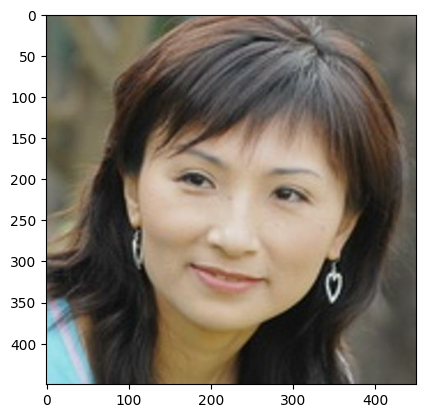

1/1 [==============================] - 0s 59ms/step
(450, 450, 3)


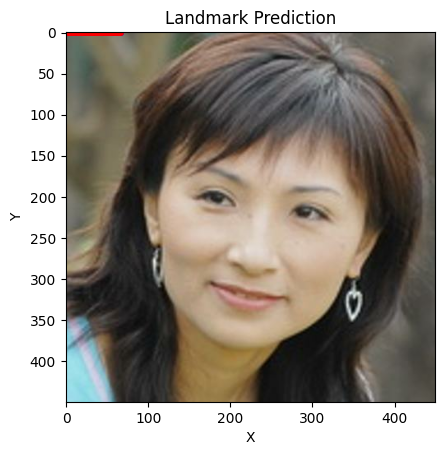

In [ ]:
from PIL import Image
# Convert lists to numpy arrays
images = np.array(images)
landmarks2D = np.array(landmarks2D)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, landmarks2D, test_size=0.25, random_state=42)
# x_train, x_test, y_train, y_test = x_train[:100], x_test[:50], y_train[:100], y_test[:50]
input_shape = images[0].shape
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense( 68 * 2, activation="softmax"),
])

# model.summary()

# batch_size = 32  # update weights every 120 images not for each image ( batch mode that can be as one update for all samples )
# epochs = 10 # num of ebocs ( num of trains on all data)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
# train_loss = model.history['loss']
# print("Train Loss: ", train_loss)
print("Test Loss: ", score[0])
print("Test Accuricy: ", score[1])

plt.imshow(x_test[0])
plt.show()

#image = Image.open('/content/WhatsApp Image 2024-04-16 at 5.27.13 PM.jpeg')
image = x_test[0]
image = Image.fromarray(image)
image = image.resize((450, 450))
# Convert to numpy array and normalize pixel values
image = np.array(image) / 255.0
# Add batch dimension as the model expects a batch of images
image = np.expand_dims(image, axis=0)

# image is the x_text[0] but with addition batch size dimension

predicted_land = model.predict(image)
# Split the array into two parts, each representing a set of points
Xs = predicted_land[:, :68]  # First 68 points
Ys = predicted_land[:, 68:]  # Last 68 points

img_height, img_width, _ , __ = image.shape
# plt.figure(figsize=(img_width , img_height ))  # Adjust the divisor as needed to control the plot size
print(x_test[0].shape)
plt.imshow(x_test[0])
# plt.show()
Xs = predicted_land[:, :68].flatten()  # First 68 points
Ys = predicted_land[:, 68:].flatten()  # Last 68 points
# for i in range(68):
#     # plt.scatter(Xs[i] * img_width, Ys[i] * img_height, color='blue', s=5)
#     # plt.scatter(Xs[i] * img_width, Ys[i] * img_height, color='red', s=5)
#     x_plot = max(0, min(Xs[i] , img_width - 2))
#     y_plot = max(0, min(Ys[i] , img_height -2))
#     plt.scatter(x_plot, y_plot, color='blue', s=5)
#     plt.scatter(y_plot, y_plot, color='red', s=5)

# plot points on the image but it wrong
plt.scatter(range(68), Xs, color='blue', s=5, label='x')  # Blue points for X coordinates
plt.scatter(range(68), Ys, color='red', s=5, label='y')   # Red points for Y coordinates

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Landmark Prediction')
# plt.legend()
plt.show()

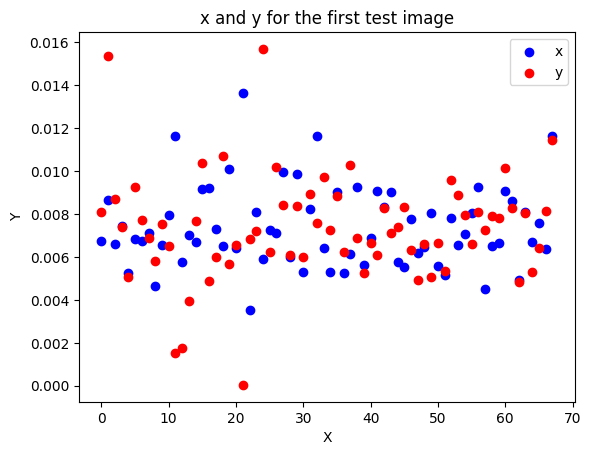

In [ ]:
# Plot the points in seperate plot
plt.scatter(range(68), Xs.flatten(), color='blue', label='x')  # Flatten the array for plotting
plt.scatter(range(68), Ys.flatten(), color='red', label='y')   # Flatten the array for plotting
plt.xlabel('X')
plt.ylabel('Y')
plt.title( "x and y for the first test image")
plt.legend()
plt.show()

 x_train and x_test are numpy arrays of images, where each image has a shape (height, width, channels). When you pass x_train to the model for training, the model expects batches of images with this shape.

However, when you want to predict on a single image, you can't directly pass an image with shape (height, width, channels) because the model expects a batch of images with shape (batch_size, height, width, channels). Therefore, you need to preprocess the single image to match the shape expected by the model for prediction.

The preprocessing involves resizing the image to match the input shape expected by the model. This ensures that the input to the model during prediction is consistent with the input used during training.

-

np.expand_dims() in this line is to add an extra dimension to the array to simulate a batch dimension.
Here's what happens step by step:
axis=0: This specifies the axis along which the new dimension should be added. When axis=0, a new dimension
is added at the beginning of the array shape.